In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.datasets import fashion_mnist
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers, models

In [ ]:
(x_train, x_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


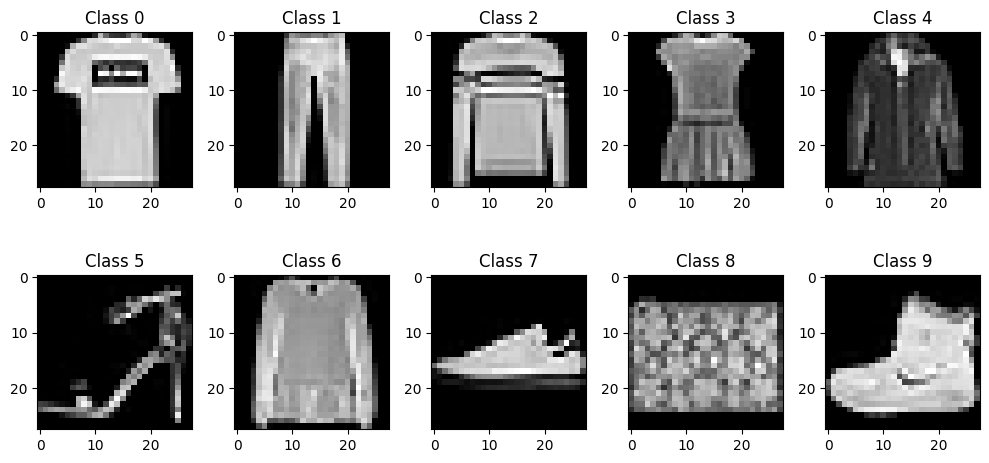

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape,y_test.shape))

# One-hot encode the labels
trainy_onehot = np.eye(10)[y_train]
testy_onehot = np.eye(10)[y_test]

# Plot one sample image for each class
class_samples = {}
for i in range(10):
    class_samples[i] = np.where(y_train == i)[0][0]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[class_samples[i]].reshape(28, 28), cmap='gray')
    plt.title(f"Class {i}")
    plt.axis('on')
plt.tight_layout()
plt.show()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1, 1)
(60000,)
(10000, 28, 28, 1, 1)
(10000,)


In [ ]:
callbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]

In [ ]:
num_hidden_layers = 2
hidden_layer_sizes = [120, 84]  # Number of neurons in each hidden layer
# Define LeNet-5 architecture
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=(4, 4), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1, 1), activation="relu", padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Flatten())
for i in range(num_hidden_layers):
    model.add(layers.Dense(hidden_layer_sizes[i], activation='relu'))
model.add(Dense(1000, activation="softmax"))
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train,y_train,epochs=1,callbacks=callbacks,batch_size=32,validation_data=(x_test,y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

1875/1875 [==============================] - 615s 327ms/step - loss: 0.6554 - accuracy: 0.7649 - val_loss: 0.4466 - val_accuracy: 0.8367
313/313 - 14s - loss: 0.4466 - accuracy: 0.8367 - 14s/epoch - 46ms/step
Test accuracy: 0.8367000222206116


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 15s 49ms/step - loss: 0.4466 - accuracy: 0.8367


[0.4465721547603607, 0.8367000222206116]

In [ ]:
model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train,y_train,epochs=1,callbacks=callbacks,batch_size=32,validation_data=(x_test,y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

1875/1875 [==============================] - 650s 345ms/step - loss: 0.3120 - accuracy: 0.8862 - val_loss: 0.3616 - val_accuracy: 0.8767
313/313 - 14s - loss: 0.3616 - accuracy: 0.8767 - 14s/epoch - 46ms/step
Test accuracy: 0.8766999840736389


In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train,y_train,epochs=1,callbacks=callbacks,batch_size=32,validation_data=(x_test,y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

1875/1875 [==============================] - 583s 310ms/step - loss: 0.2437 - accuracy: 0.9086 - val_loss: 0.3072 - val_accuracy: 0.8881
313/313 - 14s - loss: 0.3072 - accuracy: 0.8881 - 14s/epoch - 46ms/step
Test accuracy: 0.8881000280380249


In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train,y_train,epochs=1,callbacks=callbacks,batch_size=32,validation_data=(x_test,y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

1875/1875 [==============================] - 606s 323ms/step - loss: 0.2793 - accuracy: 0.8985 - val_loss: 0.3780 - val_accuracy: 0.8752
313/313 - 14s - loss: 0.3780 - accuracy: 0.8752 - 14s/epoch - 46ms/step
Test accuracy: 0.8751999735832214
